In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Import data set

In [2]:
data = pd.read_csv("/Users/dhchoe/Desktop/D212/D212_1/churn_clean.csv")

In [3]:
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


# Create data set to be used for kmean  clustering

In [4]:
data = data[['MonthlyCharge', 'Tenure', 'Bandwidth_GB_Year']]

In [5]:
data.head()

,MonthlyCharge,Tenure,Bandwidth_GB_Year
0,172.455519,6.795513,904.536110
1,242.632554,1.156681,800.982766
2,159.947583,15.754144,2054.706961
3,119.956840,17.087227,2164.579412
4,149.948316,1.670972,271.493436


# Check for missing values

In [6]:
data.isnull().sum()

MonthlyCharge        0
Tenure               0
Bandwidth_GB_Year    0
dtype: int64

# Perform preprocessing

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Extract cleaned dataset

In [8]:
data.to_csv('/Users/dhchoe/Desktop/D212/D212_1/df_cleaned.csv')

# Elbow plot for number of clusters

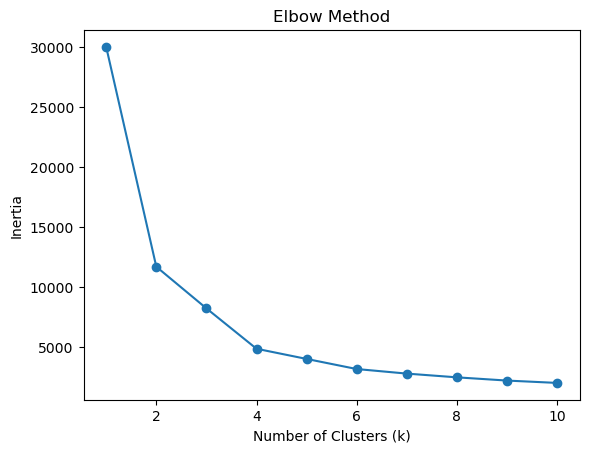

In [9]:
inertia = []
k_values = range(1, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Kmeans clustering

In [10]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

# Silhouette score

In [11]:
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette score for k = {k}: {silhouette_avg}")

Silhouette score for k = 4: 0.4757319887193295


# Creating the Cluster column 

In [12]:
data['Cluster'] = kmeans.labels_

In [13]:
data.head()

,MonthlyCharge,Tenure,Bandwidth_GB_Year,Cluster
0,172.455519,6.795513,904.536110,0
1,242.632554,1.156681,800.982766,2
2,159.947583,15.754144,2054.706961,0
3,119.956840,17.087227,2164.579412,0
4,149.948316,1.670972,271.493436,0


# Visualizing the clusters

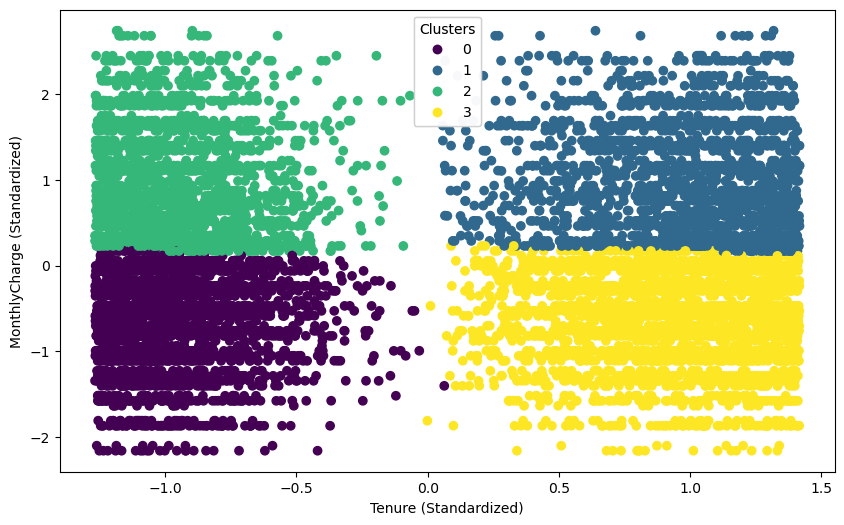

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data_scaled[:, 1], data_scaled[:, 0], c=data['Cluster'], cmap='viridis')

ax.set_xlabel('Tenure (Standardized)')
ax.set_ylabel('MonthlyCharge (Standardized)')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

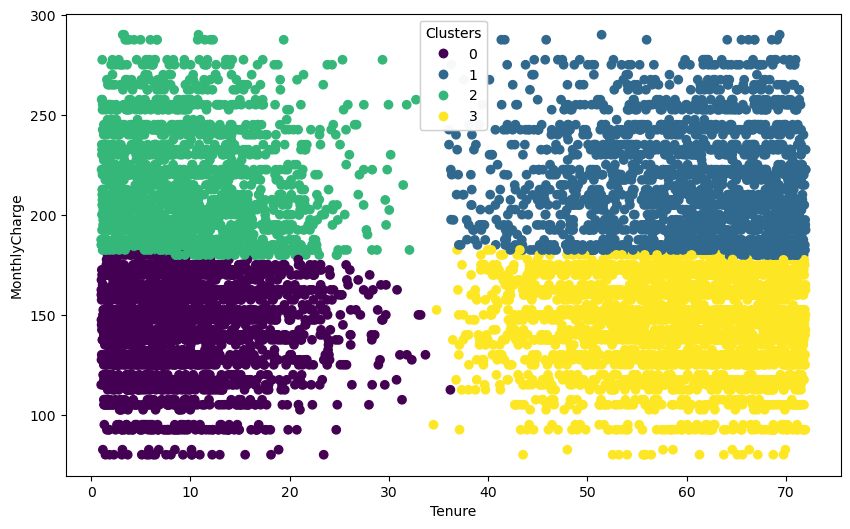

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data['Tenure'], data['MonthlyCharge'], c=data['Cluster'], cmap='viridis')

ax.set_xlabel('Tenure')
ax.set_ylabel('MonthlyCharge')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [16]:
counts = data['Cluster'].value_counts()

print(counts)

3    3023
0    2965
2    2034
1    1978
Name: Cluster, dtype: int64


In [17]:
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=2, random_state=42)

In [18]:
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette score for k = {k}: {silhouette_avg}")

Silhouette score for k = 2: 0.563729775460491


In [19]:
data['Cluster'] = kmeans.labels_

data.head()

,MonthlyCharge,Tenure,Bandwidth_GB_Year,Cluster
0,172.455519,6.795513,904.536110,1
1,242.632554,1.156681,800.982766,1
2,159.947583,15.754144,2054.706961,1
3,119.956840,17.087227,2164.579412,1
4,149.948316,1.670972,271.493436,1


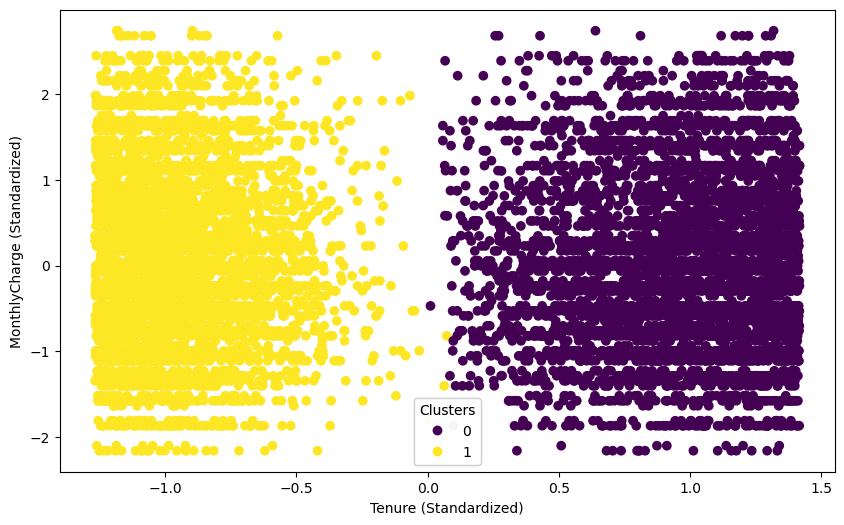

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data_scaled[:, 1], data_scaled[:, 0], c=data['Cluster'], cmap='viridis')

ax.set_xlabel('Tenure (Standardized)')
ax.set_ylabel('MonthlyCharge (Standardized)')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

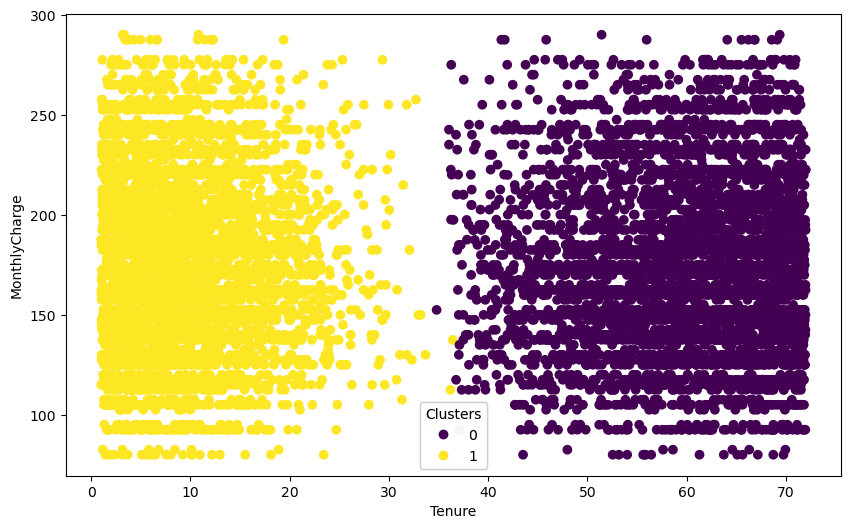

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data['Tenure'], data['MonthlyCharge'], c=data['Cluster'], cmap='viridis')

ax.set_xlabel('Tenure')
ax.set_ylabel('MonthlyCharge')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [22]:
counts = data['Cluster'].value_counts()

print(counts)

1    5001
0    4999
Name: Cluster, dtype: int64
